# Connect Intensive - Machine Learning Nanodegree

## Week 2. Machine Learning in Python

### Objectives    

- Introduction to scikit-learn 
- Implementation of machine learning algorithms in scikit-learn  
    - Explore a dataset and prepare it for `sklearn`. 
    - Build a predictive `DecisionTreeClassifier` model for the Titanic Survival Dataset.  
    - Evaluate the model using different metrics. 
    
### Prerequisites   

 - You should have the following python packages installed:
    - [numpy](http://www.scipy.org/scipylib/download.html)
    - [pandas](http://pandas.pydata.org/getpandas.html)
    - [matplotlib](http://matplotlib.org/index.html)
    - [seaborn](http://seaborn.pydata.org) 
    - [sklearn](http://scikit-learn.org/stable/install.html)
 - If you're rusty on basic python programming and exploratory data analysis, check out Jupyter notebooks from week 1 in the [Udacity_connect repo](https://github.com/yanfei-wu/Udacity_connect/tree/master/wk1).  
 
*Acknowledgement: Part of this notebook is adapted from Nick Hoh's [repo](https://github.com/nickypie/ConnectIntensive/blob/master/lesson-03-part-01.ipynb).*

---

# 1 | Introduction to Scikit-Learn

### What is scikit-learn?  

Scikit-learn (`sklearn`) is an open-source machine learning library for Python. It provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.  

<img src="sklearn.png" width="600"/>

Scikit-learn is built upon Numpy and [SciPy](https://www.scipy.org) (Scientific Python) and complements this scientific environment with machine learning algorithms.  



### Algorithms 

- Supervised learning:  
    - Linear models (Ridge, Lasso, Elastic Net, ...)  
    - Support Vector Machines  
    - Tree-based methods (Random Forests, Bagging, GBRT, ...)  
    - Nearest neighbors  
    - Neural networks  
    - Gaussian Processes  
    - Feature selection   
    
- Unsupervised learning:  
    - Clustering (KMeans, Ward, ...)    
    - Matrix decomposition (PCA, ICA, ...)  
    - Density estimation  
    - Outlier detection  

- Model selection and evaluation:  
    - Cross-validation  
    - Grid-search  
    - Lots of metrics  

... and many more! (See our [Reference](http://scikit-learn.org/stable/))  


### Installation 

Scikit-learn requires:  
- Python (>= 2.7 or >= 3.3)    
- NumPy (>= 1.8.2)    
- SciPy (>= 0.13.3)    

The easiest way is to install is via `pip` or `conda`:  

```sh
pip install -U scikit-learn
conda install scikit-learn
```  

### Resources  

- [Documentation and examples](http://scikit-learn.org/stable/index.html) from scikit-learn homepage  
- Scikit-learn's [Github Repository](https://github.com/scikit-learn) for the code  
- Books:  
    - [Building Machine Learning Systems with Python](https://www.amazon.com/dp/1782161406?tag=inspiredalgor-20)  
    - [Learning scikit-learn: Machine Learning in Python](https://www.amazon.com/dp/1783281936?tag=inspiredalgor-20) 

> *Note: the scikit-learn is focused on modeling data, not on loading and manipulating data. For these features, refer to NumPy and Pandas.*

## 2 | Step-by-Step Guide of Machine Learning in Python

### Step 0: Import Libraries   

As usual, we start by importing some useful libraries and modules. Make sure you have `scikit-learn` installed.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

try:
    import sklearn
    print("Successfully imported sklearn! (Version {})".format(sklearn.__version__))
    skversion = int(sklearn.__version__[2:4])
except ImportError:
    print("Could not import sklearn!")

Successfully imported sklearn! (Version 0.19.0)


In [2]:
# set maximum rows to display
pd.options.display.max_rows = 15 # default is 60

### Step 1: Reading in the data & Exploratory Analysis

For this tutorial, we are going to use the famous Titanic Survival dataset from [Kaggle](https://www.kaggle.com/c/titanic) (only the training set will be used; a little preprocessing of the dataset was done). This is like the "Hello World!" in machine learning. The goal of this notebook is to demonstrate how we can leverage the predictive models from scikit-learn (sklearn). 

In [3]:
# read data into pandas dataframe
data = pd.read_csv('./data/titanic_data.csv')
print 'Titanic dataset loaded!'

Titanic dataset loaded!


In [4]:
# get some general infromation of the dataset 
# view the first 5 rows of the dataframe 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# get a concise summary of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.4+ KB


From the above information, we know that the dataset contains **889 rows and 12 columns**. There are **both numerical variables and categorical variables** in the dataset. Also notice that some columns contain **missing values**, for features `Age` and `Cabin`.   

The key feature we will attempt to predict (i.e., the target variable) in this project is the `Survived` feature, which is equal to 0 or 1 for a passenger who died or survived, respectively. Note that you should start any machine learning project with exploratory data analysis to learn more about the dataset.  

> *Note: If you're already comfortable with exploratory data analysis in pandas, and want to move on to prediction with the sklearn library, feel free to skip ahead.*

### EXERCISES - Data Exploration 

#### Q1: How many people survived? How many people did not survive? Answer with both numbers and visualizaton.   
**Hint:** `seaborn.countplot()` could be a handy tool. 

In [6]:
num_survived = data['Survived'].sum()
num_deceased = data.shape[0] - num_survived 
print 'Number of survived: {} \nNumber of deceased: {}'.format(num_survived, num_deceased)

Number of survived: 340 
Number of deceased: 549


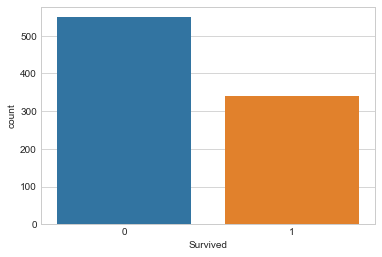

In [7]:
# visualization
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data)

#### Q2: How many males and females are in the dataset? Plot barplot showing suvived/deceased by `Sex`.  
**Hint:** look up the `hue` parameter in `seaborn.countplot()`.  

In [8]:
num_male = data[data['Sex'] == 'male'].shape[0]
num_female = data[data['Sex'] == 'female'].shape[0]
print 'Number of males: {} \nNumber of females: {}'.format(num_male, num_female)

Number of males: 577 
Number of females: 312


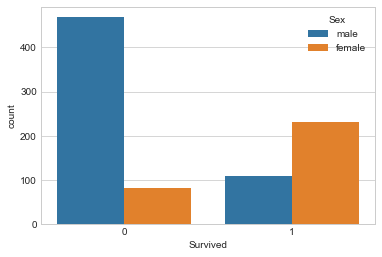

In [9]:
sns.countplot(x='Survived', hue='Sex', data=data)

#### Q3: How do the counts of suvived passengers differ among different `Pclass`?  
**Hint:** Again, `seaborn.countplot()` can be a handy visualization tool. To calculate the exact count, look into [`pandas.groupby()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). 

In [10]:
data.groupby(['Pclass', 'Survived']).size()

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

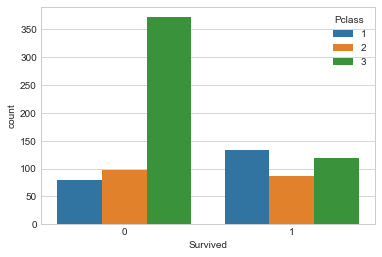

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=data)

#### Q4: From which port did the most passengers embark? Which port with the fewest passengers?

In [12]:
data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

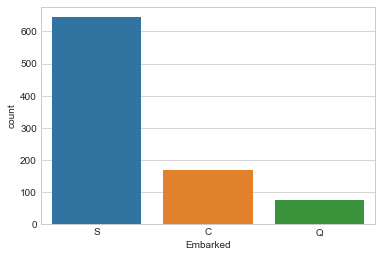

In [13]:
sns.countplot(x='Embarked', data=data)

#### Q5: How is the age distribution like in the Titanic passengers? Plot a histogram and also provide some summary statistics. 

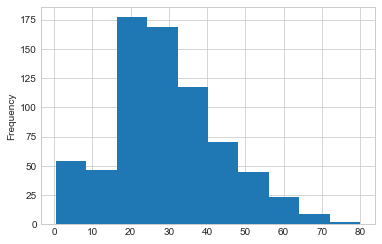

In [14]:
data['Age'].plot.hist() # with pandas built-in plotting

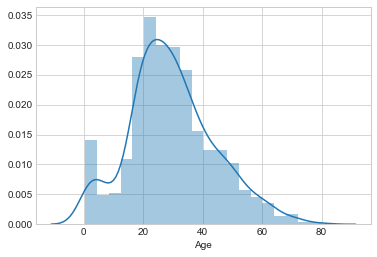

In [15]:
sns.distplot(data['Age'].dropna()) # with seaborn

#### Q6: How is age distribution different among passengers from different `Pclass`? 
**Hint:** A side-by-side boxplot or violin plot can be useful for this question. 

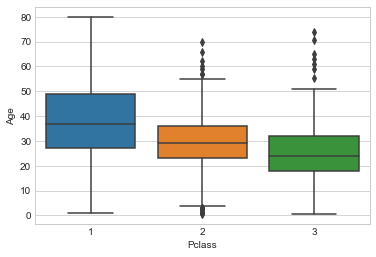

In [16]:
sns.boxplot(x='Pclass', y='Age', data=data) # box plot

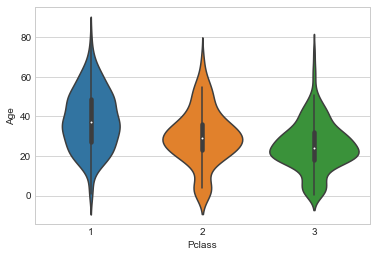

In [17]:
sns.violinplot(x='Pclass', y='Age', data=data) # violin plot

#### Q7: Is there anything else in the dataset you think worth exploring?

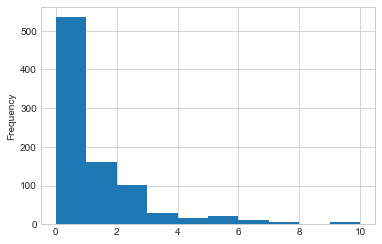

In [18]:
# Example: number of family members on board distribution
(data['SibSp'] + data['Parch']).plot.hist()

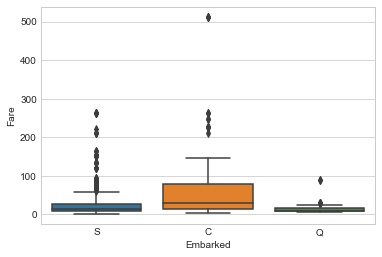

In [19]:
# Example: Fare vs embarked 
sns.boxplot(x='Embarked', y='Fare', data=data)

### Step 2: Preprocessing and cleaning the data  

When we are approaching a machine learning problem, we should always start with a well-posed problem in mind. The question here in this project could be "Can we predict whether or not a passenger aboard the Titanic survived using the other features present in the Titanic data set?" Then, based on our exploratory data analysis, we can build a predictive model using features we select from the original dataset. For example, we can use:  

- `Pclass`: Passenger's class (1 = first; 2 = second; 3 = third)
- `Sex`: Passenger's sex (male or female)
- `Age`: Passenger's age
- `SibSp`: Number of passenger's siblings/spouses on board
- `Parch`: Number of passenger's parents/children on board
- `Fare`: Price of the passenger's ticket
- `Embarked`: The port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton) 

Of course, sometimes we can create more features by manipulating the original features. For example, in this dataset, with the passengers' names, we can extract the prefix `Mr`, `Mrs`, and `Miss` as a possible feature. 

Most of the times, we will have to do some preprocessing for the dataset to be ready for model building with `sklearn`.   

#### Dealing with Missing Values 

As shown by `data.info()` above, we have some missing values in our dataset. In addition to relying on `.info()` to check if there are missing values. We can also use `pandas.isnull()` or even visualize the distribution of missing values with `seaborn`. **Run** the following cells to find out. 

In [20]:
# pd.isnull() 
pd.isnull(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False,False,False,True,False
883,False,False,False,False,False,False,False,False,False,False,True,False


In [21]:
# the table we obtained above is actually less useful
# we want the total number of missing values by column
pd.isnull(data).sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

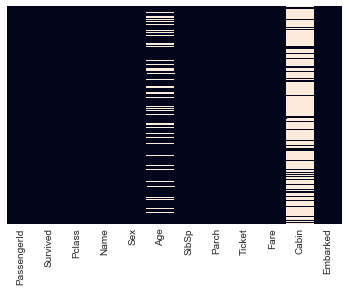

In [22]:
# use seaborn to visualize missing values
sns.heatmap(pd.isnull(data), yticklabels=False, cbar=False)

Roughly 20 percent of the `Age` data is missing. The proportion of `Age` missing is likely small enough for reasonable replacement with some form of imputation. For the `Cabin` column, it seems that we are missing too much data to do something useful with the data as it is. We can either drop this feature, or change it to another feature, e.g., "Cabin Known: 1 or 0".   

> **Discussion:** if we would like to use `Age` as one our features but 20% of them are missing, what can we do? Propose some options. 

### EXERCISES  

#### Q1: Implement your way of dealing with the missing `Age` values in the cells below.

In [23]:
# impute with median by Pclass since the three classes have different age distribution
def impute_age(cols): 
    """ impute missing age value with the median for the corresponding Pclass """
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return data[data['Pclass'] == 1]['Age'].median()
        elif pclass == 2:
            return data[data['Pclass'] == 2]['Age'].median()
        else:
            return data[data['Pclass'] == 2]['Age'].median()
    else:
        return age

data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

#### Dealing with Categorical Variable - `pandas.Series.map()` and `pandas.get_dummies()`

The `data.info()` we ran above also shows that there are both numerical variables and categorical variables in the dataset. Note that for categorical variables, we need to convert them to numerical variables.

The method [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) can take a Python dictionary as a parameter or argument. The keys of the dictionary are the current entries in the `Series` object, while the values of the dictionary are the new desired entries for the `Series` object. For example, consider the `'Sex'` feature. We'd like to map the two genders, `'female'` and `'male'`, to numbers, e.g. 0 and 1.  

**Run** the cell below to use `Series.map()` to map the genders `'female'` and `'male'` to 0 and 1, respectively, then display the first few rows of the `DataFrame` object, and the `dtype`, to show that the `'Sex'` feature is now numeric.

In [24]:
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1, 0:0, 1:1})
display(data.head())
display(data['Sex'].dtype)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


dtype('int64')

How about other categorical variables, e.g., `'Embarked'` feature? We could map the `'Embarked'` feature to numerical values, as in the dictionary `{'C': 0, 'Q': 1, 'S': 2}`. 

However, such integer representation would interpret the categories as being ordered, i.e., Cherbourg < Queenstown < Southampton, which is clearly not the case. Therefore, we can use the so-called [one-hot encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) to turn the features into dummy variables, which can be implemented by [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html). 

**Run** the cell below to see what the dummy variables for the `Series` object `data['Embarked']` look like!

In [25]:
embarked_dummies = pd.get_dummies(data['Embarked'])
display(embarked_dummies)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
...,...,...,...
882,0,0,1
883,0,1,0


The original categorical variable `Embarked` had three distinct categories: `C` for Cherbourg, `Q` for Queenstown, and `S` for Southampton. By calling `pandas.get_dummies(data['Embarked'])`, we get a `DataFrame` object where the number of columns corresponds to the number of distinct categories in the `Series` object. Each column is called a **dummy variable** or an **indicator variable**. The names of the dummy variables are simply the categories from the original `Series` object. The values of the dummy variable `C` are 1 in the rows where `'Embarked'` is equal to `C`, and 0 otherwise.

But the new column names `C`, `Q`, `S` are less descriptive than the original `Embarked`. We could specify the `prefix` parameter in `pd.get_dummies()` as `Embarked` so that the three new column names make more sense. 

**Run** the cell below to see how it looks:

In [26]:
embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
display(embarked_dummies)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
...,...,...,...
882,0,0,1
883,0,1,0


#### Get the Final Dataset Ready

In [27]:
# drop columns will not be used
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'],axis=1, inplace=True) # note inplace

In [28]:
# concatenate the dummy variables created by `Embarked` to the 
data = pd.concat([data, embarked_dummies], axis=1)
display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


#### Save the preprocessed data  

Now that we've preprocessed and cleaned the training and testing datasets, we want to save our progress so that we don't have to repeat preprocessing. **Run** the cell below to write DataFrame object to a csv file  using [`pandas.DataFrame.to_csv()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html). 

In [29]:
data.to_csv('./data/titanic_cleaned.csv', index=False)
print 'Cleaned Titanic training data set saved!'

Cleaned Titanic training data set saved!


### Step 3: Choosing the right model and learning algorithm  

With the problem we formulated for this project and our knowledge about the dataset, we know that we are dealing with a supervised classification problem. Choosing the right model and learning algorithm is a big topic in machine learning and we will focus on it in our future sessions. For now, let's just start with one of the simplest model for this problem, `DecisionTreeClassifier` from `sklearn`. 

In [30]:
# import 
from sklearn.tree import DecisionTreeClassifier

### Step 4: Training and testing

Let's start by splitting our data. As covered in the lecture, we can split the data into training, validation, and test sets. 
  - **Training set:** A set of examples used training, i.e., to fit the parameters of model.
  - **Validation set:** A set of examples used to tune the model.
  - **Test set:** A set of examples used only *once* to see how the model generalizes to unseen data.
  
#### `train_test_split()` 

The latest version of the library `sklearn` has the module `model_selection`, which contains the method [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We can use this method to split `data` further into a training and a validation set. The arguments that we need to pass to `train_test_split()` are: 

  - `X` and `y`: Arrays. These can be `pandas` `DataFrame` or `Series` objects. 
  - `test_size`: A float with the proportion of data to put into the test set, e.g., `test_size = 0.1` would 10% of the data as the test set.
  - `random_state`: The pseudo-random number generator state used for random sampling. For a given value of `random_state`, the method will partition the data set exactly the same way each time, which is useful for debugging. 
  - `stratified`: 

**Run** the cell below to create the `DataFrame` object `X` and the `Series` object `y` from `data`. Then use `train_test_split()` with a `random_state` to split the dataset. 

In [31]:
# import train_test_split
from sklearn.model_selection import train_test_split  

# X is a pandas DataFrame object with the features
X = data.drop('Survived', axis=1)

# y is a pandas Series object with the target variable 'Survived'
y = data['Survived'] 

# Split the data into training and test data sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Split the training data into training and validation sets: 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=21)

# Take a look at the first few rows of the training features and classes
display(X_train.head())
display(y_train.head())

# Verify that the data sets were split 80% training and 20% testing
print 'The number of instances in the original data: {}'.format(data.shape[0])
print 'The number of instances in the training set: {}'.format(len(y_train))
print 'The number of instances in the validation set: {}'.format(len(y_valid))
print 'The number of instances in the test set: {}'.format(len(y_test)) 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
522,1,0,44.0,0,1,57.9792,1,0,0
490,3,1,21.0,0,0,7.2500,0,0,1
272,1,1,37.0,0,1,29.7000,1,0,0
33,2,1,66.0,0,0,10.5000,0,0,1
288,3,0,22.0,0,0,7.7500,0,1,0


522    1
490    0
272    0
33     0
288    1
Name: Survived, dtype: int64

The number of instances in the original data: 889
The number of instances in the training set: 568
The number of instances in the validation set: 143
The number of instances in the test set: 178


#### Build a Classifier. 

For supervised learning problems, the model building `sklearn` workflow is pretty similar, regardless of the type of classifier you'd like to build: 
  1. **Create** a classifier object. 
  2. **Train** the classifier on the training data set. 
  3. **Predict** with the classifier on the validation (test) data set. 
  4. **Assess** the performance of the classifier by comparing the predictions to the actual labels. 

In [32]:
# Import DecisionTreeClassifier and accuracy_score from the appropriate sklearn modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. CREATE the classifier object... in this example, we call it clf1
clf1 = DecisionTreeClassifier(random_state=21)

# 2. TRAIN the classifier object using the method .fit()
clf1.fit(X_train, y_train)

# 3. PREDICT labels for the validation (test) set using the method .predict()
y_pred_train = clf1.predict(X_train)
y_pred_valid  = clf1.predict(X_valid)

# 4. ASSESS the accuracy of the classifier, comparing the predictions to the actual labels.
print 'The model has an accuracy of {:.1f}% on the training set, and {:.1f}% on the validation set'.\
      format(100.0 * accuracy_score(y_train, y_pred_train),\
             100.0 * accuracy_score(y_valid, y_pred_valid))

The model has an accuracy of 98.6% on the training set, and 80.4% on the validation set


### EXERCISE

#### Q1: Do you think the above model might be overfitting or underfitting? 

In [ ]:
# overfitting

#### Q2: Check what are available parameters in `DecisionTreeClassifier`. Play with different parameters and check how accuracy is different. 

In [ ]:
# change the 'max_depth' parameter

### Step 5: Model Evaluation

In this case, we can do something better than using accuracy to evaluate our model. We have covered a number of performance metrics for classification model in the lecture, such as confusion matrix, precision and recall, F-beta score. In the following exercise, you will calculate the metrics for the model you just built above.  

### EXERCISE

#### Q1: Show a confusion matrix for the validation result.

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred_valid)

array([[74,  8],
       [20, 41]])

#### Q2: What are the precision and recall for your model?

In [34]:
from sklearn.metrics import precision_score
print 'Precision score on training set is {:.3f}, on the validation set is {:.3f}'.\
    format(precision_score(y_train, y_pred_train), precision_score(y_valid, y_pred_valid))

Precision score on training set is 0.995, on the validation set is 0.837


In [35]:
from sklearn.metrics import recall_score
print 'Recall score on training set is {:.3f}, on the validation set is {:.3f}'.\
    format(recall_score(y_train, y_pred_train), recall_score(y_valid, y_pred_valid))

Recall score on training set is 0.969, on the validation set is 0.672


#### Q3: Calculate the training and test F1 scores. 

In [36]:
from sklearn.metrics import f1_score
print 'F1 score on training set is {:.3f}, on the validation set is {:.3f}'.\
    format(f1_score(y_train, y_pred_train), f1_score(y_valid, y_pred_valid))

F1 score on training set is 0.982, on the validation set is 0.745


### What to Do Next

Depending on how comfortable you are about the content covered in this tutorial, you can 

- Read scikit-learn documentation and find out what other classification models are available. Pick one of them and build a classification model for this problem. Evaluate the model you pick and compare it with `DecisionTreeClassifier`.  

- Implemented multiple classification models and use cross validation to pick the best one. Try improve the performance of the model you pick.  

- Choose a classification dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) and do step 1 through step 5 for the dataset you pick. 